In [60]:
import pandas as pd

df = pd.read_csv("day.csv")

df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [61]:
print("Shape dataset:", df.shape)

df.info()

Shape dataset: (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [62]:
features = [
    'season',
    'holiday',
    'weathersit',
    'temp',
    'atemp',
    'hum',
    'windspeed'
]

X = df[features]

X.head()

,season,holiday,weathersit,temp,atemp,hum,windspeed
0,1,0,2,0.344167,0.363625,0.805833,0.160446
1,1,0,2,0.363478,0.353739,0.696087,0.248539
2,1,0,1,0.196364,0.189405,0.437273,0.248309
3,1,0,1,0.200000,0.212122,0.590435,0.160296
4,1,0,1,0.226957,0.229270,0.436957,0.186900


In [63]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_df = pd.DataFrame(X_scaled, columns=features)

X_scaled_df.head()

,season,holiday,weathersit,temp,atemp,hum,windspeed
0,-1.348213,-0.171981,1.110427,-0.826662,-0.679946,1.250171,-0.387892
1,-1.348213,-0.171981,1.110427,-0.721095,-0.740652,0.479113,0.749602
2,-1.348213,-0.171981,-0.726048,-1.634657,-1.749767,-1.339274,0.746632
3,-1.348213,-0.171981,-0.726048,-1.614780,-1.610270,-0.263182,-0.389829
4,-1.348213,-0.171981,-0.726048,-1.467414,-1.504971,-1.341494,-0.046307


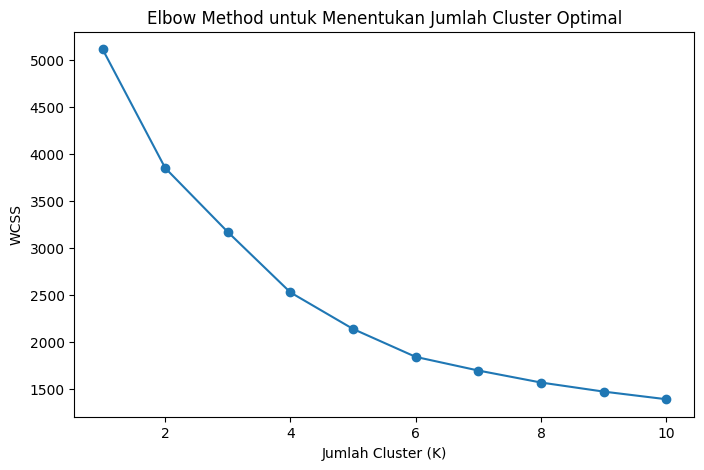

In [64]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Jumlah Cluster (K)")
plt.ylabel("WCSS")
plt.title("Elbow Method untuk Menentukan Jumlah Cluster Optimal")
plt.show()

In [65]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)

df['cluster'] = kmeans.fit_predict(X_scaled)

In [66]:
cluster_summary = df.groupby('cluster')[features + ['cnt']].mean()

cluster_summary

,season,holiday,weathersit,temp,atemp,hum,windspeed,cnt
cluster,,,,,,,,
0,1.760563,0.035211,1.390845,0.317492,0.314980,0.567825,0.224886,3106.112676
1,2.964206,0.024609,1.398210,0.608409,0.575612,0.666059,0.168631,5392.713647


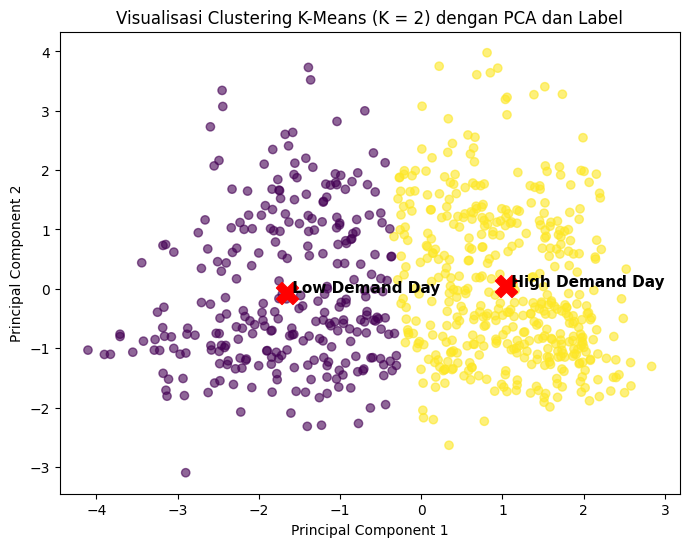

In [67]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# PCA ke 2 dimensi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Proyeksi centroid ke ruang PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Mapping label cluster
cluster_names = {
    0: "Low Demand Day",
    1: "High Demand Day"
}

plt.figure(figsize=(8,6))

# Plot data
scatter = plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    c=df['cluster'],
    cmap='viridis',
    alpha=0.6
)

# Plot centroid
plt.scatter(
    centroids_pca[:, 0],
    centroids_pca[:, 1],
    c='red',
    marker='X',
    s=250
)

# Tambahkan label teks di centroid
for i, (x, y) in enumerate(centroids_pca):
    plt.text(
        x,
        y,
        f" {cluster_names[i]}",
        fontsize=11,
        fontweight='bold',
        color='black'
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualisasi Clustering K-Means (K = 2) dengan PCA dan Label")
plt.show()

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

y = df['cluster']
X = X_scaled

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Logistic Regression: 0.9863945578231292

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        57
           1       0.98      1.00      0.99        90

    accuracy                           0.99       147
   macro avg       0.99      0.98      0.99       147
weighted avg       0.99      0.99      0.99       147



In [69]:
import joblib

joblib.dump(kmeans, "kmeans_bike_k2.pkl")
joblib.dump(logreg, "logreg_cluster_predictor.pkl")
joblib.dump(scaler, "scaler_bike.pkl")
joblib.dump(features, "clustering_features.pkl")

print("Semua model berhasil disimpan!")

Semua model berhasil disimpan!
